# Pymaceuticals Inc.

---


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
full_results = mouse_metadata.merge(study_results, on="Mouse ID")

# Display the data table for preview
full_results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
full_results.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [3]:
# Checking the number of mice.
mouse_count = full_results['Mouse ID'].nunique()
mouse_count

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = full_results[full_results.duplicated(subset=['Mouse ID', 'Timepoint'],keep=False) == True]
duplicates



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID.
ms989 = full_results[full_results['Mouse ID'] == 'g989']
ms989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
full_results_cleaned = full_results[~(full_results['Mouse ID'] == 'g989')]

In [7]:
# Checking the number of mice in the clean DataFrame.
mouse_count_clean = full_results_cleaned['Mouse ID'].nunique()
mouse_count_clean

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

groupby_data = full_results_cleaned.groupby('Drug Regimen')

groupby_df = pd.DataFrame({'Mean Tumor Growth (mm3)': groupby_data['Tumor Volume (mm3)'].mean(),
                           'Median Tumor Growth (mm3)': groupby_data['Tumor Volume (mm3)'].median(),
                           'Tumor Growth  (mm3) Variance': groupby_data['Tumor Volume (mm3)'].var(),
                           'Tumor Growth (mm3) Standard Deviation': groupby_data['Tumor Volume (mm3)'].std(),
                           'Tumor Growth (mm3) SEM': groupby_data['Tumor Volume (mm3)'].sem()})


groupby_df



,Mean Tumor Growth (mm3),Median Tumor Growth (mm3),Tumor Growth (mm3) Variance,Tumor Growth (mm3) Standard Deviation,Tumor Growth (mm3) SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
grouped_data = full_results_cleaned.groupby('Drug Regimen').agg({
    'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']
})
grouped_data

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

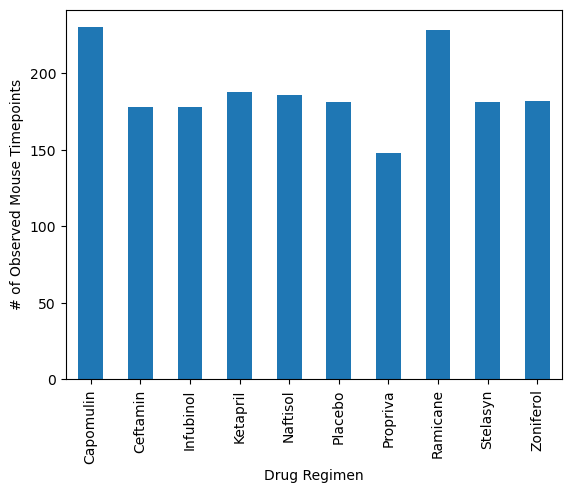

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
pandas_bar = full_results_cleaned.groupby('Drug Regimen').agg({'Timepoint': 
    'count' }).plot.bar(legend=False, ylabel='# of Observed Mouse Timepoints')
display(pandas_bar)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Ramicane'),
  Text(1, 0, 'Capomulin'),
  Text(2, 0, 'Infubinol'),
  Text(3, 0, 'Placebo'),
  Text(4, 0, 'Ceftamin'),
  Text(5, 0, 'Stelasyn'),
  Text(6, 0, 'Zoniferol'),
  Text(7, 0, 'Ketapril'),
  Text(8, 0, 'Propriva'),
  Text(9, 0, 'Naftisol')])

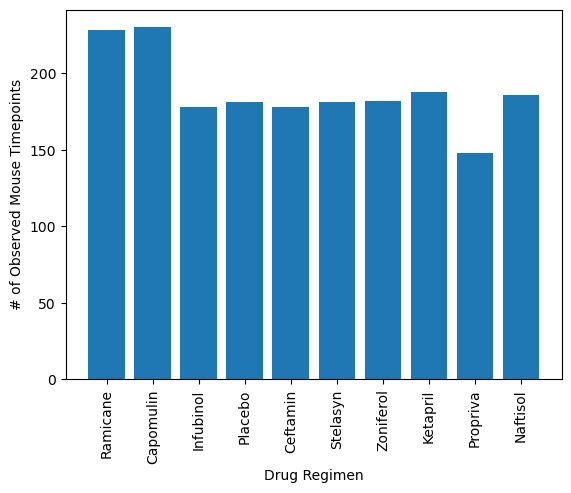

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_list = full_results_cleaned['Drug Regimen'].unique()

group_counts = []

for drug in drug_list:
   # Get all entries for this drug
   shortlist = full_results_cleaned[full_results_cleaned['Drug Regimen'] == drug]
   # Count the number of entries
   count = shortlist['Timepoint'].count()
   # Add to our counts
   group_counts.append(count)

plt.bar(x=drug_list, height=group_counts)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation='vertical')


<Axes: ylabel='count'>

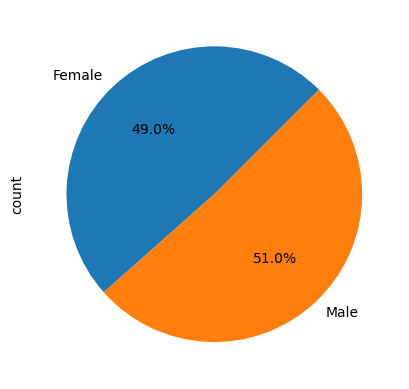

In [12]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their sex
mice_sex = full_results_cleaned.groupby('Sex')['Mouse ID'].count()

# Make the pie chart
mice_sex.plot(kind='pie', ylabel='count',autopct='%1.1f%%', startangle=45)

Text(0, 0.5, 'count')

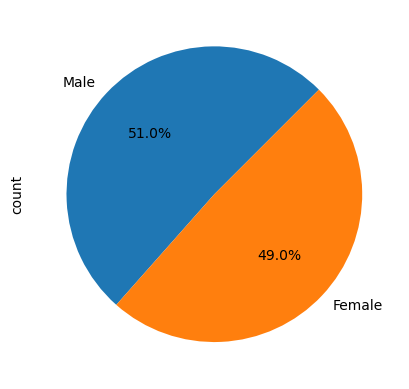

In [13]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
plt.pie(full_results_cleaned['Sex'].value_counts(), labels=['Male', 'Female'], autopct='%1.1f%%', startangle=45)

# Make the pie chart
plt.ylabel('count')


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_time_mice = full_results_cleaned.sort_values(by='Timepoint', ascending=False).drop_duplicates('Mouse ID', keep='first')

last_time_mice.reset_index(drop=True, inplace=True)
last_time_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,z969,Naftisol,Male,9,30,45,73.867845,4
1,p136,Zoniferol,Female,5,28,45,63.488697,2
2,g296,Zoniferol,Female,14,29,45,68.163195,4
3,g497,Ketapril,Male,19,28,45,69.872251,2
4,g316,Capomulin,Female,22,22,45,40.159220,2
...,...,...,...,...,...,...,...,...
243,u153,Ceftamin,Female,11,25,0,45.000000,0
244,t573,Ceftamin,Female,15,27,0,45.000000,0
245,h428,Ketapril,Female,1,27,0,45.000000,0
246,n482,Propriva,Female,4,29,0,45.000000,0


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
   
for treatment in treatments:   

    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = last_time_mice[last_time_mice['Drug Regimen'] == treatment]

    # add subset
    tumor_vol_data.append(treatment_data[['Tumor Volume (mm3)', 'Drug Regimen']])

    # Determine outliers using upper and lower bounds
    q1, q2, q3 = treatment_data['Tumor Volume (mm3)'].quantile([.25,.5, .75])
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = treatment_data[(treatment_data['Tumor Volume (mm3)'] < lower_bound) | (treatment_data['Tumor Volume (mm3)'] > upper_bound)]
    print(f"Outliers for {treatment} are outside the range ({round(lower_bound,2)}, {round(upper_bound,2)})")
    if len(outliers) == 0:
        print(f"No outliers found for {treatment}")
    else:
        print(f"Outliers for {treatment}: \n {outliers}")

Outliers for Capomulin are outside the range (20.7, 51.83)
No outliers found for Capomulin
Outliers for Ramicane are outside the range (17.91, 54.31)
No outliers found for Ramicane
Outliers for Infubinol are outside the range (36.83, 82.74)
Outliers for Infubinol: 
     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
230     c326    Infubinol  Female          18          25          5   

     Tumor Volume (mm3)  Metastatic Sites  
230           36.321346                 0  
Outliers for Ceftamin are outside the range (25.36, 87.67)
No outliers found for Ceftamin


<Axes: title={'center': 'Tumor Volume (mm3)'}, xlabel='Drug Regimen'>

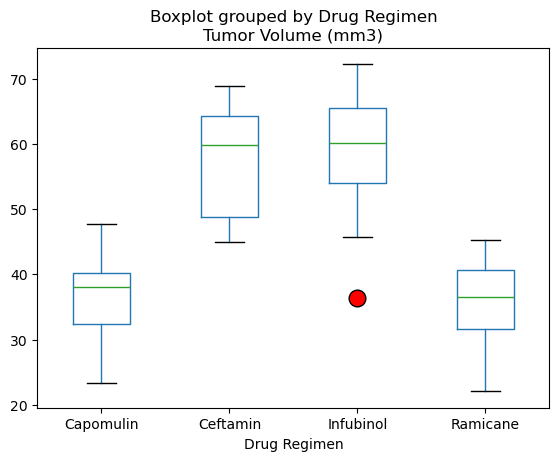

In [16]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
four_treatments = pd.concat(tumor_vol_data, ignore_index=True)

flierprops = dict(marker='o', markerfacecolor='r', markersize=12, linestyle='none', markeredgecolor='black')

four_treatments.boxplot(column="Tumor Volume (mm3)", by="Drug Regimen", flierprops=flierprops, grid=False)



## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

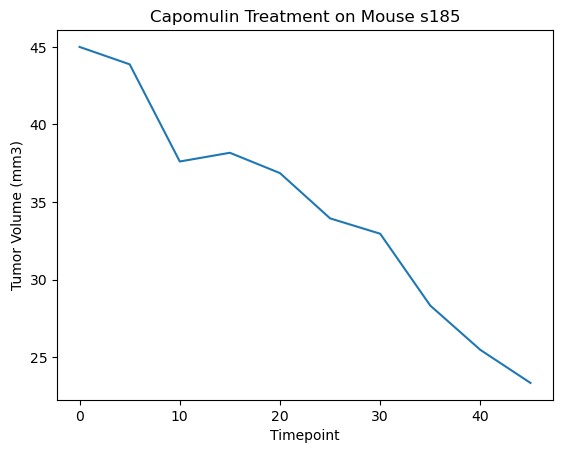

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
cap_mice = last_time_mice[last_time_mice['Drug Regimen'] == 'Capomulin'].groupby('Mouse ID').agg({"Tumor Volume (mm3)": 'mean', "Weight (g)" : 'mean'})
my_mouse = full_results_cleaned[full_results_cleaned['Mouse ID'] == 's185']
plt.plot(my_mouse['Timepoint'],my_mouse['Tumor Volume (mm3)'])

plt.title("Capomulin Treatment on Mouse s185")
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')



Text(0, 0.5, 'Tumor Volume (mm3)')

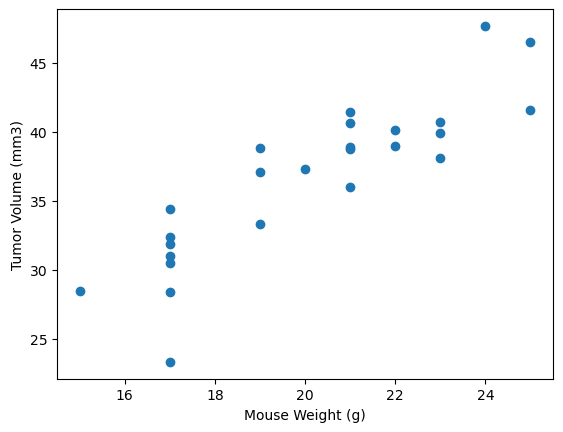

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.scatter(cap_mice['Weight (g)'], cap_mice['Tumor Volume (mm3)'])
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")


## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corr = cap_mice['Tumor Volume (mm3)'].corr(cap_mice['Weight (g)'])

print(f"The correlation between tumor volume and mouse weight is {round(corr,4)}")

# Perform Linear Regression
x = cap_mice['Tumor Volume (mm3)']
y = cap_mice['Weight (g)']

slope, intercept, r_value, p_value, std_error = st.linregress(x, y)

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")
print(f"Standard error: {std_error}")

The correlation between tumor volume and mouse weight is 0.8767
Slope: 0.4390902208326348
Intercept: 4.0196295927808805
R-squared: 0.7686134812139006
P-value: 9.0844290886732e-09
Standard error: 0.05023482274073633
